In [6]:
import sys
import os
import subprocess

app_base_dir = '/home/eusobg/EUSO-SPB/euso-spb-patt-reco-v1'
if app_base_dir not in sys.path:
    sys.path.append(app_base_dir)

import collections
import numpy as np
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as psql
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob
#import ROOT

In [2]:
import tool.npy_frames_visualization as npy_vis


In [3]:
con = pg.connect("dbname=eusospb_data user=eusospb password=1e20eVjemeuso host=localhost")
cur = con.cursor()

In [6]:
simu_events = psql.read_sql(
    "SELECT * FROM simu_event JOIN simu_event_spb_proc USING (simu_event_id);",
    con)

In [7]:
simu_events

,simu_event_id,simu2npy_pathname,npyconv_pathname,num_frames,eheader_num,eheader_run,eheader_runname,eheader_random_seed,eheader_status,edetector_numphotons,...,eelectronics_numactivegtus,eelectronics_gtustart,eelectronics_gtuend,eelectronics_numcells,eelectronics_timegtu0,eelectronics_timefirstgtu,eelectronics_timelastgtu,eelectronics_gtulength,relation_id,event_id
0,1,/media/node15_data2/SPBDATA_processed/spb_simu...,/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_si...,17,2,1234,Simu,230720146,0,32011,...,0,-1,0,1,143360.0,5.368710e+12,-1.000000e+20,2500.0,1,992930
1,1,/media/node15_data2/SPBDATA_processed/spb_simu...,/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_si...,17,2,1234,Simu,230720146,0,32011,...,0,-1,0,1,143360.0,5.368710e+12,-1.000000e+20,2500.0,2,992931
2,1,/media/node15_data2/SPBDATA_processed/spb_simu...,/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_si...,17,2,1234,Simu,230720146,0,32011,...,0,-1,0,1,143360.0,5.368710e+12,-1.000000e+20,2500.0,3,992932
3,1,/media/node15_data2/SPBDATA_processed/spb_simu...,/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_si...,17,2,1234,Simu,230720146,0,32011,...,0,-1,0,1,143360.0,5.368710e+12,-1.000000e+20,2500.0,4,992933
4,5,/media/node15_data2/SPBDATA_processed/spb_simu...,/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_si...,15,22,1234,Simu,71533709,0,21607,...,0,-1,0,1,97037.3,5.368710e+12,-1.000000e+20,2500.0,5,992934
5,5,/media/node15_data2/SPBDATA_processed/spb_simu...,/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_si...,15,22,1234,Simu,71533709,0,21607,...,0,-1,0,1,97037.3,5.368710e+12,-1.000000e+20,2500.0,6,992935
6,5,/media/node15_data2/SPBDATA_processed/spb_simu...,/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_si...,15,22,1234,Simu,71533709,0,21607,...,0,-1,0,1,97037.3,5.368710e+12,-1.000000e+20,2500.0,7,992936
7,5,/media/node15_data2/SPBDATA_processed/spb_simu...,/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_si...,15,22,1234,Simu,71533709,0,21607,...,0,-1,0,1,97037.3,5.368710e+12,-1.000000e+20,2500.0,8,992937
8,9,/media/node15_data2/SPBDATA_processed/spb_simu...,/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_si...,43,33,1234,Simu,2714504765,0,202978,...,0,-1,0,1,246429.0,5.368710e+12,-1.000000e+20,2500.0,9,992938
9,9,/media/node15_data2/SPBDATA_processed/spb_simu...,/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_si...,43,33,1234,Simu,2714504765,0,202978,...,0,-1,0,1,246429.0,5.368710e+12,-1.000000e+20,2500.0,10,992939


In [8]:
simu_events['etruth_trueenergy'].hist()

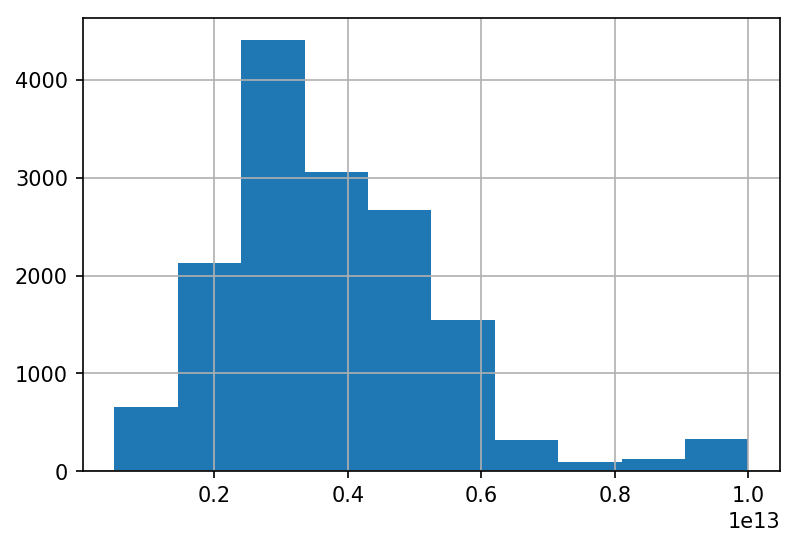

In [9]:
plt.show()

In [11]:
simu_events['etruth_trueenergy'][ simu_events['etruth_trueenergy'] > 0.6e13 ].hist()

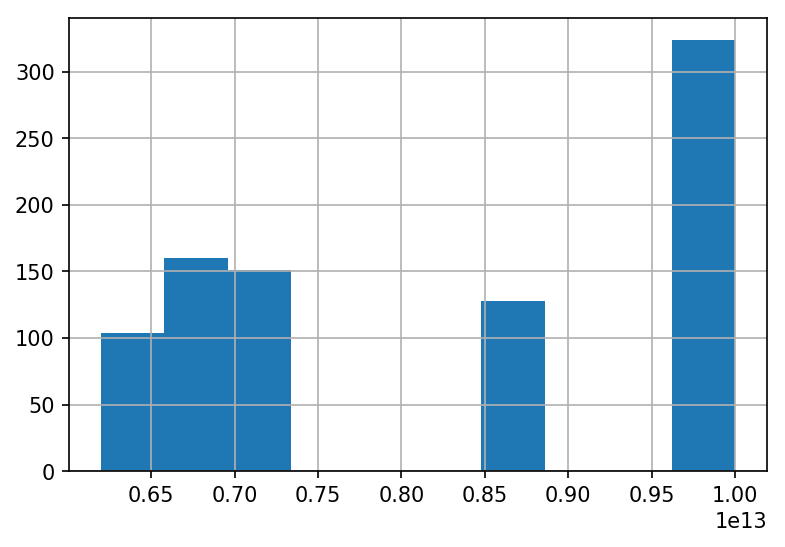

In [12]:
plt.show()

In [20]:
r = simu_events['edetector_numfee'].hist()
r.set_yscale('log')

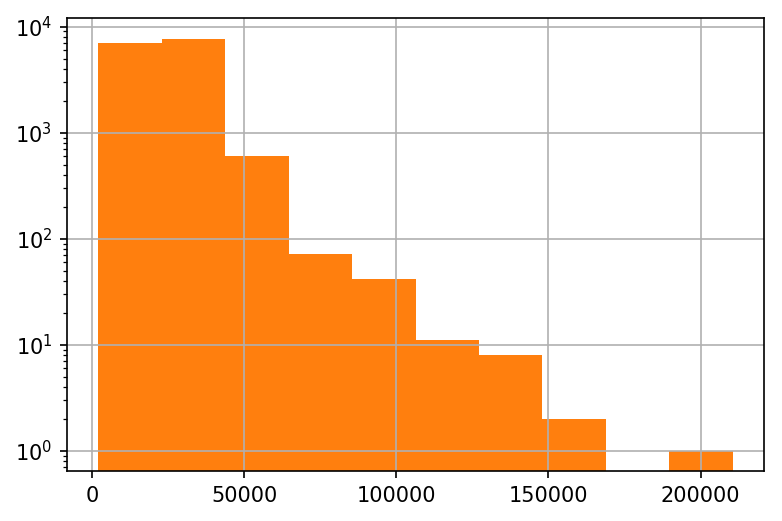

In [21]:
plt.show()

In [96]:
# simu_events['edetector_numfee'] < 50000
trigg_events = simu_events[ simu_events['eptttrigger_eptttriggersegment_0_numevt'].notnull() ][['event_id','edetector_numfee','simu2npy_pathname','etruth_trueenergy','etruth_truetheta','eptttrigger_eptttriggersegment_0_numevt']].sort_values(['edetector_numfee'],ascending=[1])
trigg_events

,event_id,edetector_numfee,simu2npy_pathname,etruth_trueenergy,etruth_truetheta,eptttrigger_eptttriggersegment_0_numevt
7524,1000454,4288,/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_si...,4.466840e+12,0.401234,48.0
1956,994886,6355,/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_si...,2.818380e+12,0.401234,48.0
1960,994890,6355,/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_si...,2.818380e+12,0.401234,48.0
1962,994892,6355,/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_si...,2.818380e+12,0.401234,48.0
1952,994882,6355,/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_si...,2.818380e+12,0.401234,48.0
7330,1000260,7566,/media/node15_data2/SPBDATA_processed/spb_simu...,2.400000e+12,0.426427,25.0
7334,1000264,7566,/media/node15_data2/SPBDATA_processed/spb_simu...,2.400000e+12,0.426427,25.0
7339,1000269,7566,/media/node15_data2/SPBDATA_processed/spb_simu...,2.400000e+12,0.426427,25.0
7343,1000273,7566,/media/node15_data2/SPBDATA_processed/spb_simu...,2.400000e+12,0.426427,25.0
7347,1000277,7566,/media/node15_data2/SPBDATA_processed/spb_simu...,2.400000e+12,0.426427,25.0


In [100]:
test_ev = trigg_events.iloc[0]
frames_first_trigg_event_signals = np.load(glob.glob(test_ev.simu2npy_pathname[:-9]+'*signals.npy')[0])
frames_first_trigg_event_counts = np.load(glob.glob(test_ev.simu2npy_pathname[:-9]+'*counts.npy')[0])
print("Energy of the visualized event: {} MeV; Zenith angle: {} deg".format(test_ev.etruth_trueenergy, np.rad2deg(test_ev.etruth_truetheta)))

Energy of the visualized event: 4466840000000.0 MeV; Zenith angle: 22.989014797152073 deg


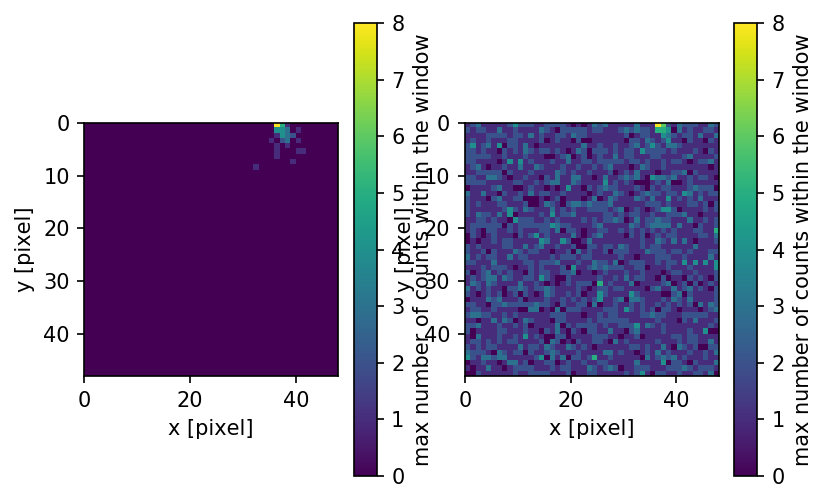

(<matplotlib.figure.Figure at 0x7f96b04f4668>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f972e1d4f98>)

In [101]:
fig, axs = plt.subplots(1,2)
npy_vis.visualize_frame(np.maximum.reduce(frames_first_trigg_event_signals), ax=axs[0], show=False)
npy_vis.visualize_frame(np.maximum.reduce(frames_first_trigg_event_counts), ax=axs[1])

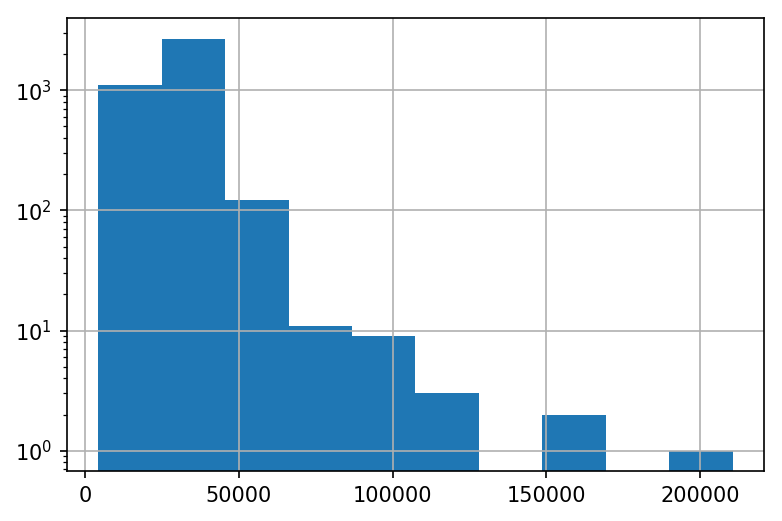

3913


In [107]:
r = trigg_events['edetector_numfee'].hist()
r.set_yscale('log')
plt.show()
print(len(trigg_events['edetector_numfee']))

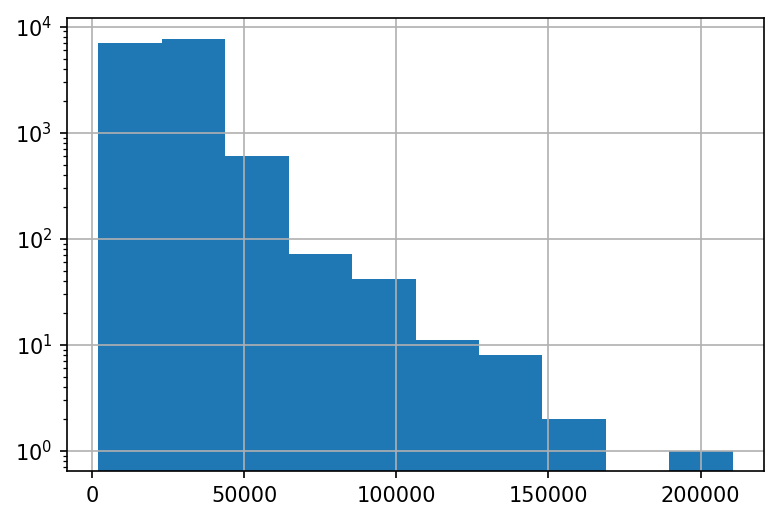

15339


In [111]:
r = simu_events['edetector_numfee'].hist()
r.set_yscale('log')
plt.show()
print(len(simu_events['edetector_numfee']))

In [121]:
fee_events = simu_events[ simu_events['edetector_numfee']>30000 ][['event_id','edetector_numfee','simu2npy_pathname','etruth_trueenergy','etruth_truetheta','eptttrigger_eptttriggersegment_0_numevt']].sort_values(['edetector_numfee'],ascending=[1])
fee_events

,event_id,edetector_numfee,simu2npy_pathname,etruth_trueenergy,etruth_truetheta,eptttrigger_eptttriggersegment_0_numevt
1302,994232,30001,/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_si...,2.818380e+12,0.779997,69.0
1307,994237,30001,/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_si...,2.818380e+12,0.779997,69.0
2545,995475,30003,/media/node15_data2/SPBDATA_processed/spb_simu...,1.900000e+12,1.093720,NaN
2525,995455,30003,/media/node15_data2/SPBDATA_processed/spb_simu...,1.900000e+12,1.093720,NaN
2554,995484,30003,/media/node15_data2/SPBDATA_processed/spb_simu...,1.900000e+12,1.093720,NaN
2550,995480,30003,/media/node15_data2/SPBDATA_processed/spb_simu...,1.900000e+12,1.093720,NaN
2530,995460,30003,/media/node15_data2/SPBDATA_processed/spb_simu...,1.900000e+12,1.093720,NaN
2540,995470,30003,/media/node15_data2/SPBDATA_processed/spb_simu...,1.900000e+12,1.093720,NaN
2535,995465,30003,/media/node15_data2/SPBDATA_processed/spb_simu...,1.900000e+12,1.093720,NaN
8338,1001268,30004,/media/node15_data2/SPBDATA_processed/spb_simu...,5.300000e+12,0.696797,13.0


In [122]:
test_ev = fee_events.iloc[0]
frames_first_fee_event_signals = np.load(glob.glob(test_ev.simu2npy_pathname[:-9]+'*signals.npy')[0])
frames_first_fee_event_counts = np.load(glob.glob(test_ev.simu2npy_pathname[:-9]+'*counts.npy')[0])
print("Energy of the visualized event: {} MeV; Zenith angle: {} deg".format(test_ev.etruth_trueenergy, np.rad2deg(test_ev.etruth_truetheta)))

Energy of the visualized event: 2818380000000.0 MeV; Zenith angle: 44.690536132865674 deg


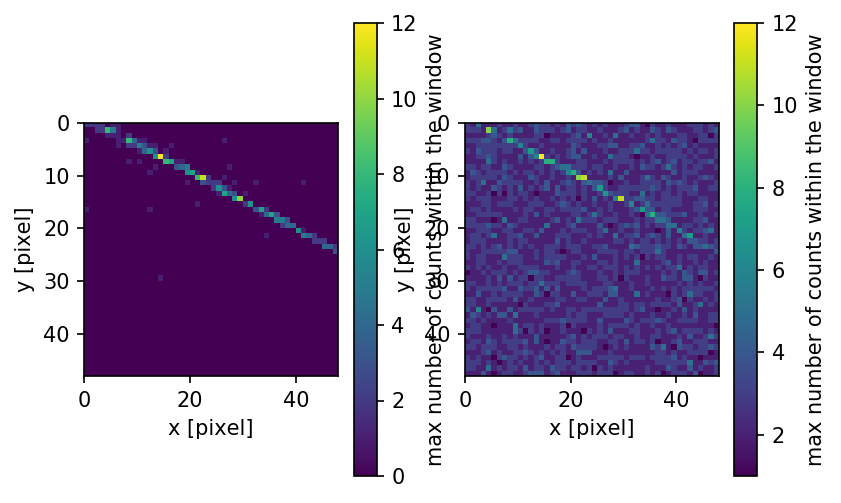

(<matplotlib.figure.Figure at 0x7f96a239a550>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f96a2316e10>)

In [123]:
fig, axs = plt.subplots(1,2)
npy_vis.visualize_frame(np.maximum.reduce(frames_first_fee_event_signals), ax=axs[0], show=False)
npy_vis.visualize_frame(np.maximum.reduce(frames_first_fee_event_counts), ax=axs[1])

# SQL Queries

## All simu events

In [132]:
# all_simu_events = psql.read_sql(
#     "SELECT tr.*, ts.edetector_numfee, ts.etruth_trueenergy, ts.etruth_truetheta , tp.gtu_in_packet, tp.num_gtu, tp.packet_id, tp.num_triggered_pixels, tp.source_file_acquisition, tp.source_file_trigger FROM simu_event_spb_proc AS tr JOIN spb_processing_event_ver2 AS tp USING(event_id) JOIN simu_event AS ts USING(simu_event_id) ;",
#     con)
all_simu_events_by_energy = psql.read_sql("SELECT COUNT(event_id) AS count_event_id, etruth_trueenergy /*, etruth_truetheta*/ FROM simu_event_spb_proc JOIN simu_event USING(simu_event_id) GROUP BY etruth_trueenergy ORDER BY etruth_trueenergy ASC", con)
all_simu_events_by_theta = psql.read_sql("SELECT COUNT(event_id) AS count_event_id, /*etruth_trueenergy ,*/ etruth_truetheta FROM simu_event_spb_proc JOIN simu_event USING(simu_event_id) GROUP BY etruth_truetheta ORDER BY etruth_truetheta ASC", con)

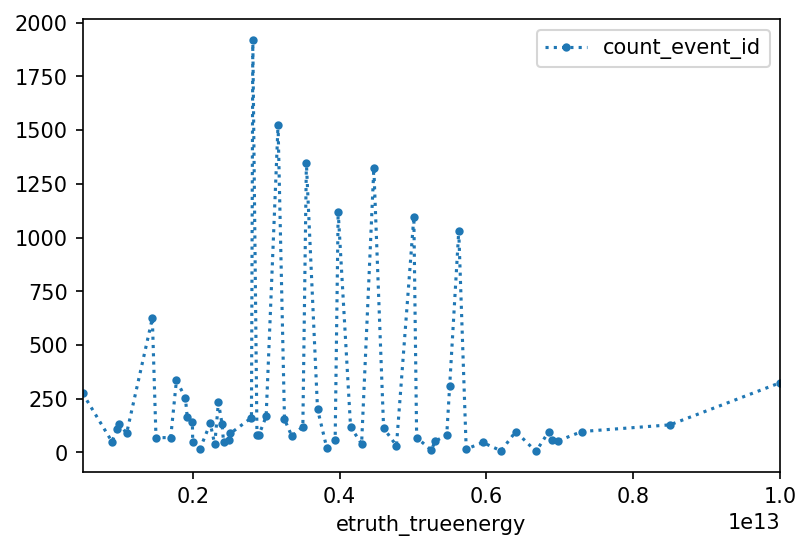

In [145]:
ax_all_simu_events_by_energy = all_simu_events_by_energy.plot(x='etruth_trueenergy',y='count_event_id',marker='.',linestyle=':')
plt.show()

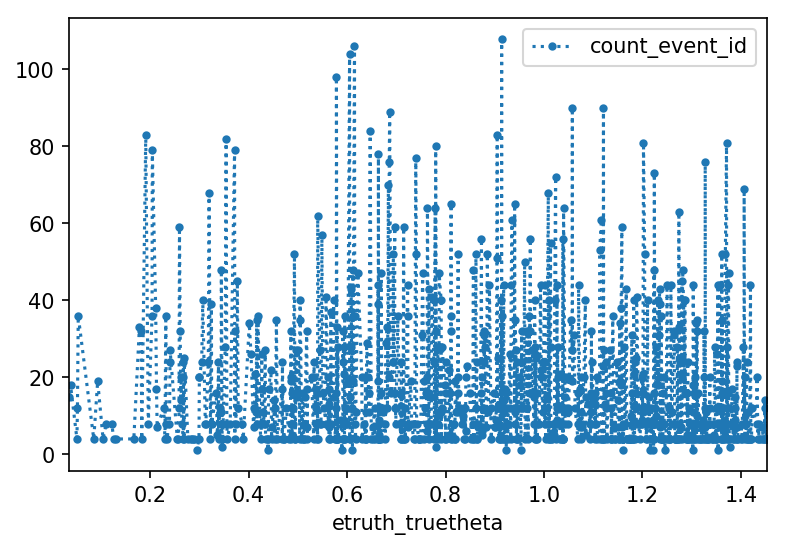

In [141]:
all_simu_events_by_theta.plot(x='etruth_truetheta',y='count_event_id',marker='.',linestyle=':')
plt.show()

## Number of triggered events in Simu as function of energy

In [182]:
# all_simu_events = psql.read_sql(
#     "SELECT tr.*, ts.edetector_numfee, ts.etruth_trueenergy, ts.etruth_truetheta , tp.gtu_in_packet, tp.num_gtu, tp.packet_id, tp.num_triggered_pixels, tp.source_file_acquisition, tp.source_file_trigger FROM simu_event_spb_proc AS tr JOIN spb_processing_event_ver2 AS tp USING(event_id) JOIN simu_event AS ts USING(simu_event_id) ;",
#     con)
strg_simu_events_by_energy = psql.read_sql("SELECT COUNT(event_id) AS count_event_id, etruth_trueenergy /*, etruth_truetheta*/ FROM simu_event_spb_proc JOIN simu_event USING(simu_event_id) WHERE eptttrigger_eptttriggersegment_0_numevt IS NOT NULL GROUP BY etruth_trueenergy ORDER BY etruth_trueenergy ASC", con)
strg_simu_events_by_theta = psql.read_sql("SELECT COUNT(event_id) AS count_event_id, /*etruth_trueenergy ,*/ etruth_truetheta FROM simu_event_spb_proc JOIN simu_event USING(simu_event_id) WHERE eptttrigger_eptttriggersegment_0_numevt IS NOT NULL GROUP BY etruth_truetheta ORDER BY etruth_truetheta ASC", con)

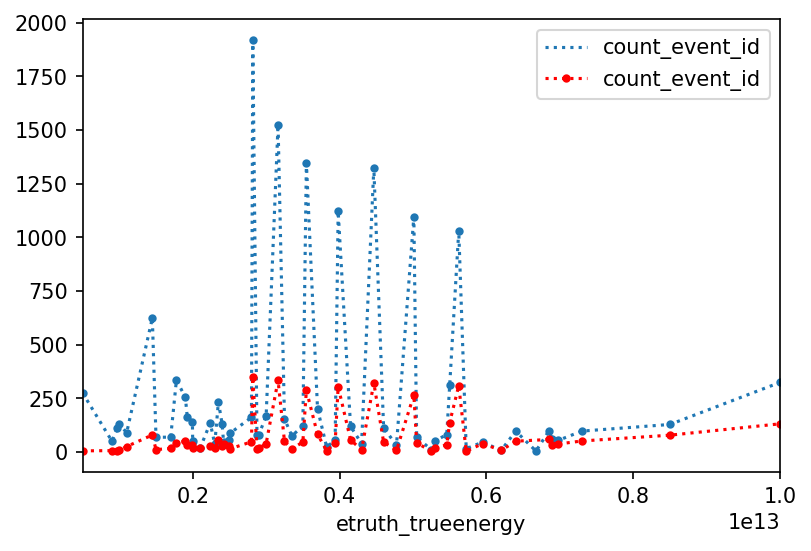

In [183]:
ax_all_simu_events_by_energy = all_simu_events_by_energy.plot(x='etruth_trueenergy',y='count_event_id',marker='.',linestyle=':')
strg_simu_events_by_energy.plot(x='etruth_trueenergy',y='count_event_id',marker='.',linestyle=':', color='red', ax=ax_all_simu_events_by_energy)
plt.show()

In [184]:
#strg_simu_events_by_energy
strg_all_merged = pd.merge(strg_simu_events_by_energy, all_simu_events_by_energy,
                                    how='outer',
                                    suffixes=['_strg','_all'],
                                    on=['etruth_trueenergy'])
strg_all_merged

,count_event_id_strg,etruth_trueenergy,count_event_id_all
0,5.0,5.000000e+11,275
1,6.0,9.000000e+11,50
2,6.0,9.750000e+11,111
3,8.0,1.000000e+12,132
4,25.0,1.100000e+12,89
5,79.0,1.450000e+12,624
6,11.0,1.500000e+12,68
7,16.0,1.700000e+12,69
8,42.0,1.778280e+12,335
9,50.0,1.900000e+12,254


In [185]:
strg_all_merged_nona = strg_all_merged.dropna().copy()
strg_all_merged_nona['count_fraction'] = strg_all_merged_nona['count_event_id_strg'] / strg_all_merged_nona['count_event_id_all']
strg_all_merged_nona

,count_event_id_strg,etruth_trueenergy,count_event_id_all,count_fraction
0,5.0,5.000000e+11,275,0.018182
1,6.0,9.000000e+11,50,0.120000
2,6.0,9.750000e+11,111,0.054054
3,8.0,1.000000e+12,132,0.060606
4,25.0,1.100000e+12,89,0.280899
5,79.0,1.450000e+12,624,0.126603
6,11.0,1.500000e+12,68,0.161765
7,16.0,1.700000e+12,69,0.231884
8,42.0,1.778280e+12,335,0.125373
9,50.0,1.900000e+12,254,0.196850


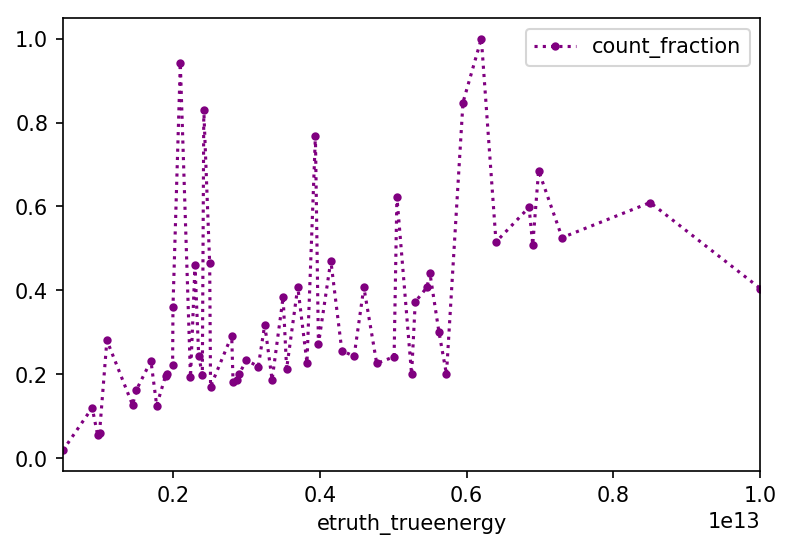

In [186]:
strg_all_merged_nona.plot(x='etruth_trueenergy', y='count_fraction', marker='.',linestyle=':', color='purple')
plt.show()

## Number of recognized triggered Simu events as function of energy 

In [187]:
cond_simu_events_by_energy = psql.read_sql(
    "SELECT COUNT(event_id) AS count_event_id, etruth_trueenergy " \
    "FROM simu_event_spb_proc "\
    "JOIN simu_event USING(simu_event_id) "\
    "JOIN spb_processing_event_ver2 USING(event_id) "\
    "WHERE eptttrigger_eptttriggersegment_0_numevt IS NOT NULL "\
    "AND num_gtu BETWEEN 12 AND 40 " \
    "AND num_triggered_pixels > 10 " \
    "AND max_n_persist > 4 " \
    "AND (abs(gtu_y_hough__peak_thr2_avg_phi) > 0.174533 OR abs(gtu_x_hough__peak_thr2_avg_phi) > 0.174533) " \
    "AND num_triggered_pixels < 800 " \
    "AND trigg_x_y_hough__peak_thr1__max_cluster_counts_sum_width < 15 " \
    "AND trigg_gtu_x_hough__peak_thr1__max_cluster_counts_sum_width < 41 " \
    "AND trigg_gtu_y_hough__peak_thr1__max_cluster_counts_sum_width < 41 " \
    "AND x_y_hough__peak_thr1__max_cluster_counts_sum_width < 25 " \
    "AND trigg_gtu_y_hough__peak_thr2__max_cluster_counts_sum_width < 20 " \
    "AND trigg_gtu_y_hough__peak_thr2__max_cluster_counts_sum_height < 20 " \
    "AND trigg_gtu_x_hough__peak_thr2__max_cluster_counts_sum_width < 20 " \
    "AND trigg_gtu_x_hough__peak_thr2__max_cluster_counts_sum_height < 20 " \
    "AND gtu_y_hough__dbscan_num_clusters_above_thr1 < 4 " \
    "AND gtu_x_hough__dbscan_num_clusters_above_thr1 < 4 " \
    "AND trigg_x_y_hough__dbscan_num_clusters_above_thr1 < 4 " \
    "AND ( abs(gtu_y_hough__peak_thr3_avg_phi) NOT BETWEEN 1.48353 " \
    "AND 1.65806 OR abs(gtu_x_hough__peak_thr3_avg_phi) NOT BETWEEN 1.48353 AND 1.65806 ) " \
    "AND trigg_gtu_y_hough__dbscan_num_clusters_above_thr1 < 3 " \
    "AND trigg_gtu_x_hough__dbscan_num_clusters_above_thr1 < 3 " \
    "AND gtu_y_hough__peak_thr1__max_cluster_counts_sum_width < 41 " \
    "AND gtu_x_hough__peak_thr1__max_cluster_counts_sum_width < 41" \
    "GROUP BY etruth_trueenergy "\
    "ORDER BY etruth_trueenergy ASC", con)

#strg_simu_events_by_theta = psql.read_sql("SELECT COUNT(event_id) AS count_event_id, /*etruth_trueenergy ,*/ etruth_truetheta FROM simu_event_spb_proc JOIN simu_event USING(simu_event_id) WHERE eptttrigger_eptttriggersegment_0_numevt IS NOT NULL GROUP BY etruth_truetheta ORDER BY etruth_truetheta ASC", con)


In [188]:
cond_simu_events_by_energy

,count_event_id,etruth_trueenergy
0,2,1.700000e+12
1,1,1.778280e+12
2,1,1.900000e+12
3,1,1.925000e+12
4,4,1.995260e+12
5,4,2.100000e+12
6,4,2.238720e+12
7,4,2.300000e+12
8,6,2.350000e+12
9,5,2.400000e+12


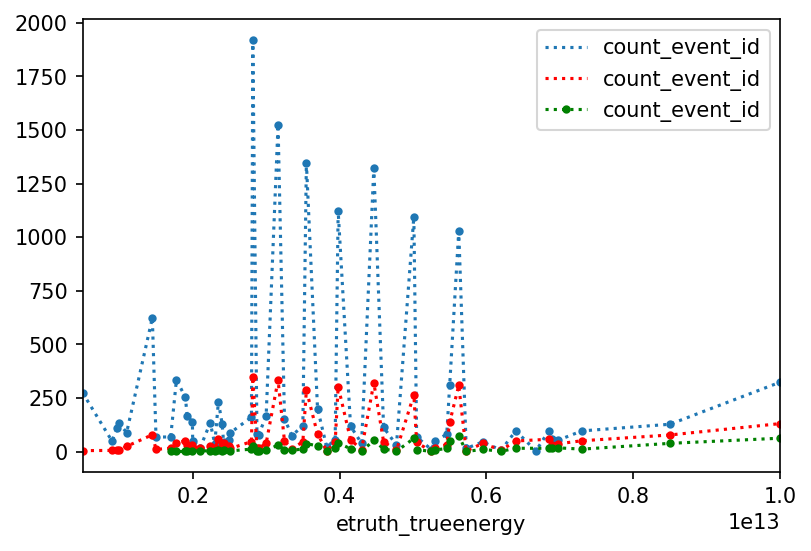

In [190]:
ax_all_simu_events_by_energy = all_simu_events_by_energy.plot(x='etruth_trueenergy',y='count_event_id',marker='.',linestyle=':')
strg_simu_events_by_energy.plot(x='etruth_trueenergy',y='count_event_id',marker='.',linestyle=':', color='red', ax=ax_all_simu_events_by_energy)
cond_simu_events_by_energy.plot(x='etruth_trueenergy',y='count_event_id',marker='.',linestyle=':', color='green', ax=ax_all_simu_events_by_energy)
plt.show()

In [191]:
cond_strg_merged = pd.merge(cond_simu_events_by_energy, strg_simu_events_by_energy,
                                    how='outer',
                                    suffixes=['_cond','_strg'],
                                    on=['etruth_trueenergy'])
cond_strg_merged

,count_event_id_cond,etruth_trueenergy,count_event_id_strg
0,2.0,1.700000e+12,16
1,1.0,1.778280e+12,42
2,1.0,1.900000e+12,50
3,1.0,1.925000e+12,33
4,4.0,1.995260e+12,31
5,4.0,2.100000e+12,16
6,4.0,2.238720e+12,26
7,4.0,2.300000e+12,17
8,6.0,2.350000e+12,57
9,5.0,2.400000e+12,26


In [193]:
cond_strg_merged_nona = cond_strg_merged.dropna().copy()
cond_strg_merged_nona['count_fraction'] = cond_strg_merged_nona['count_event_id_cond'] / cond_strg_merged_nona['count_event_id_strg']
cond_strg_merged_nona

,count_event_id_cond,etruth_trueenergy,count_event_id_strg,count_fraction
0,2.0,1.700000e+12,16,0.125000
1,1.0,1.778280e+12,42,0.023810
2,1.0,1.900000e+12,50,0.020000
3,1.0,1.925000e+12,33,0.030303
4,4.0,1.995260e+12,31,0.129032
5,4.0,2.100000e+12,16,0.250000
6,4.0,2.238720e+12,26,0.153846
7,4.0,2.300000e+12,17,0.235294
8,6.0,2.350000e+12,57,0.105263
9,5.0,2.400000e+12,26,0.192308


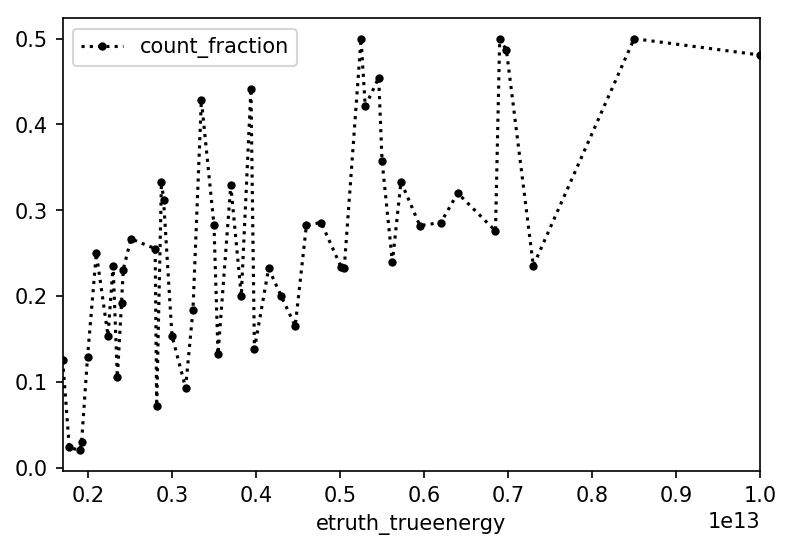

In [194]:
cond_strg_merged_nona.plot(x='etruth_trueenergy', y='count_fraction', marker='.',linestyle=':', color='black')
plt.show()

# Number of packets

In [36]:
t_all_bgf05_simu_events_by_energy_query = \
'''
SELECT COUNT(sq.count_event_id) AS count_packets, sq.etruth_trueenergy AS etruth_trueenergy 
FROM (
  SELECT COUNT(dt1.event_id) AS count_event_id, dt1.source_file_acquisition_full, etruth_trueenergy 
  FROM simu_event_spb_proc 
  JOIN simu_event USING(simu_event_id) 
  JOIN spb_processing_event_ver2 AS dt1 USING(event_id) 
  JOIN spb_processing_event_ver2 AS dt2 USING(source_file_acquisition_full) 
  WHERE dt1.source_data_type_num=3 AND dt2.source_data_type_num=5
  GROUP BY etruth_trueenergy, dt1.source_file_acquisition_full, dt1.packet_id
) as sq GROUP BY etruth_trueenergy ORDER BY etruth_trueenergy;
'''

t_all_bgf05_simu_events_by_energy = psql.read_sql( t_all_bgf05_simu_events_by_energy_query   ,con)

In [11]:
t_all_bgf05_simu_events_by_energy

,count_packets,etruth_trueenergy
0,1,9.000000e+11
1,11,1.000000e+12
2,8,1.100000e+12
3,18,1.122020e+12
4,20,1.258930e+12
5,17,1.412540e+12
6,12,1.450000e+12
7,8,1.500000e+12
8,23,1.584890e+12
9,1,1.700000e+12


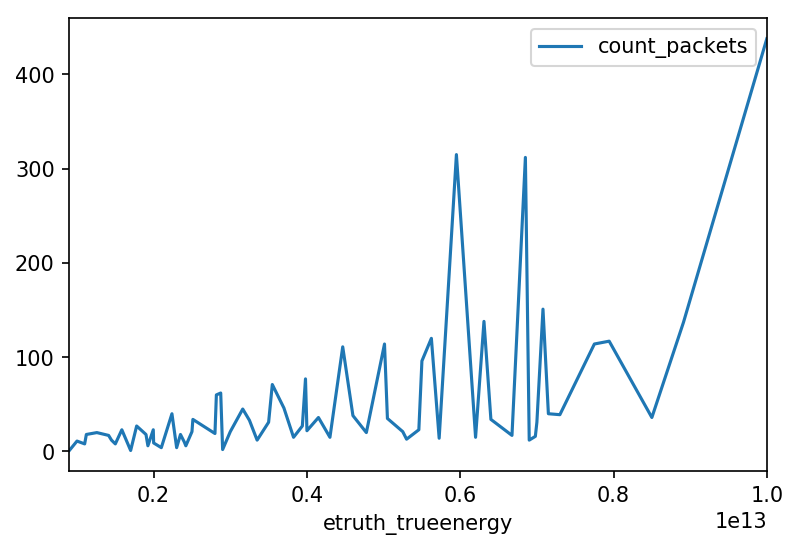

In [15]:
t_all_bgf05_simu_events_by_energy.plot(x='etruth_trueenergy', y='count_packets')
plt.show()

In [21]:
 # NOT VERY IMPORTANT

t_all_bgf10_simu_events_by_energy_query = \
'''
SELECT COUNT(sq.count_event_id) AS count_packets, sq.etruth_trueenergy AS etruth_trueenergy 
FROM (
  SELECT COUNT(dt1.event_id) AS count_event_id, source_file_acquisition,  etruth_trueenergy 
  FROM simu_event_spb_proc 
  JOIN simu_event USING(simu_event_id) 
  JOIN spb_processing_event_ver2 AS dt1 USING(event_id) 
  JOIN spb_processing_event_ver2 AS dt2 USING(source_file_acquisition) 
  WHERE dt1.source_data_type_num=5 AND dt2.source_data_type_num=3
  GROUP BY etruth_trueenergy, source_file_acquisition, dt1.packet_id
) as sq GROUP BY etruth_trueenergy ORDER BY etruth_trueenergy;
'''

t_all_bgf10_simu_events_by_energy = psql.read_sql( t_all_bgf10_simu_events_by_energy_query, con)    
    

In [27]:
t_all_bgf10_simu_events_by_energy

,count_packets,etruth_trueenergy
0,1,1.412540e+12
1,2,1.900000e+12
2,1,1.995260e+12
3,1,2.100000e+12
4,2,2.238720e+12
5,2,2.300000e+12
6,5,2.350000e+12
7,3,2.400000e+12
8,1,2.420000e+12
9,1,2.500000e+12


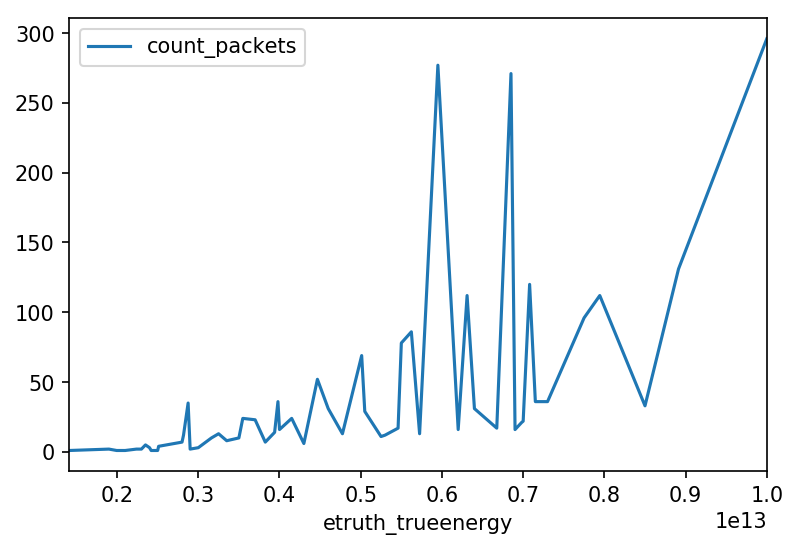

In [25]:
t_all_bgf10_simu_events_by_energy.plot(x='etruth_trueenergy', y='count_packets')
plt.show()

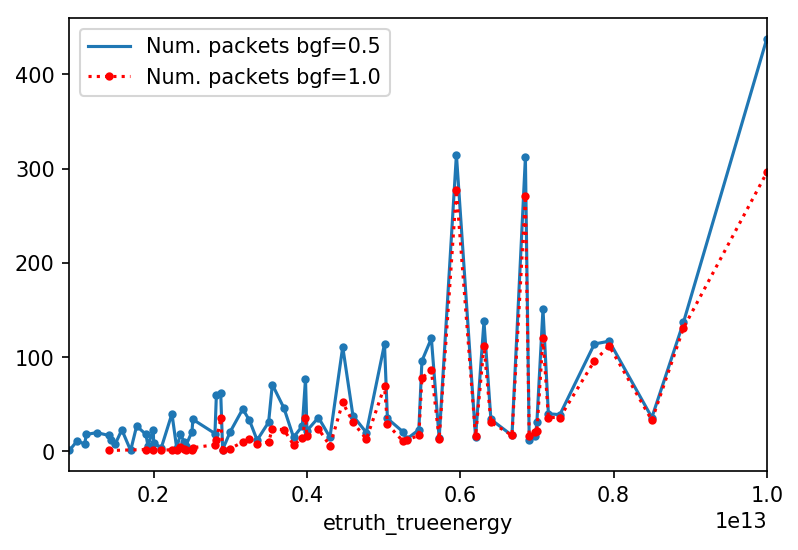

In [30]:
ax_all_bgf05_simu_events_by_energy = t_all_bgf05_simu_events_by_energy.plot(x='etruth_trueenergy',y='count_packets',marker='.',linestyle='-',label='Num. packets bgf=0.5')
t_all_bgf10_simu_events_by_energy.plot(x='etruth_trueenergy',y='count_packets',marker='.',linestyle=':', color='red', ax=ax_all_bgf05_simu_events_by_energy, label='Num. packets bgf=1.0')
plt.show()

In [33]:
# NOT VERY IMPORTANT
t_all_bgf10_simu_events_by_energy_merged = pd.merge(t_all_bgf10_simu_events_by_energy, t_all_bgf05_simu_events_by_energy,
                                    how='outer',
                                    suffixes=['_bgf10','_bgf05'],
                                    on=['etruth_trueenergy'])
t_all_bgf10_simu_events_by_energy_merged_nona = t_all_bgf10_simu_events_by_energy_merged.dropna().copy()
t_all_bgf10_simu_events_by_energy_merged_nona['count_fraction'] = t_all_bgf10_simu_events_by_energy_merged_nona['count_packets_bgf10'] / t_all_bgf10_simu_events_by_energy_merged_nona['count_packets_bgf05']
t_all_bgf10_simu_events_by_energy_merged_nona

,count_packets_bgf10,etruth_trueenergy,count_packets_bgf05,count_fraction
0,1.0,1.412540e+12,17,0.058824
1,2.0,1.900000e+12,18,0.111111
2,1.0,1.995260e+12,23,0.043478
3,1.0,2.100000e+12,4,0.250000
4,2.0,2.238720e+12,40,0.050000
5,2.0,2.300000e+12,4,0.500000
6,5.0,2.350000e+12,18,0.277778
7,3.0,2.400000e+12,10,0.300000
8,1.0,2.420000e+12,6,0.166667
9,1.0,2.500000e+12,21,0.047619


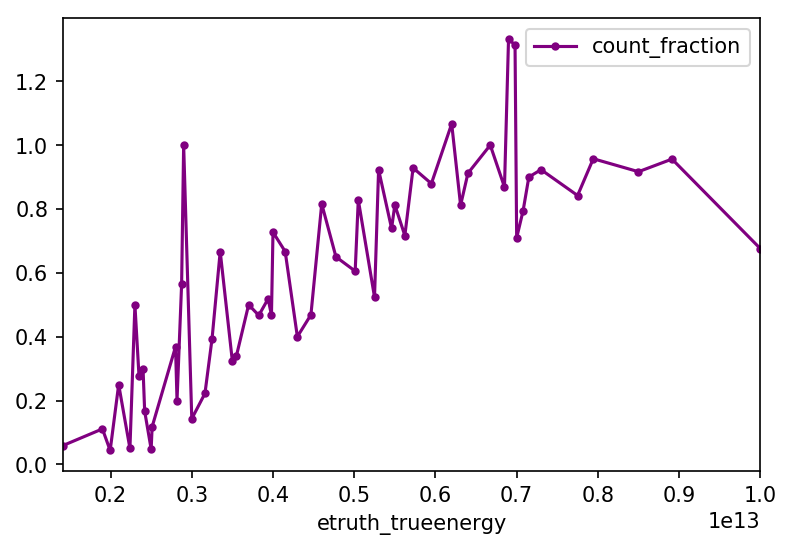

In [35]:
t_all_bgf10_simu_events_by_energy_merged_nona.plot(x='etruth_trueenergy', y='count_fraction', marker='.',linestyle='-', color='purple')
plt.show()

In [37]:
#AND x_y_hough__peak_thr3__avg_line_coord_0_x > 8 AND x_y_hough__peak_thr3__avg_line_coord_0_y > 8
cond_selection_rules = '''
  AND x_y_active_pixels_num > 1750
  AND num_gtu BETWEEN 11 AND 40
  AND num_triggered_pixels >= 6
  AND (abs(gtu_y_hough__peak_thr2_avg_phi) > 0.174533 OR abs(gtu_x_hough__peak_thr2_avg_phi) > 0.174533)
  AND num_triggered_pixels < 150
  AND trigg_x_y_hough__peak_thr1__max_cluster_counts_sum_width < 20
  AND trigg_gtu_x_hough__peak_thr1__max_cluster_counts_sum_width < 41 AND trigg_gtu_y_hough__peak_thr1__max_cluster_counts_sum_width < 41
  AND x_y_hough__peak_thr1__max_cluster_counts_sum_width < 25
  AND trigg_gtu_y_hough__peak_thr2__max_cluster_counts_sum_width < 20 AND trigg_gtu_y_hough__peak_thr2__max_cluster_counts_sum_height < 20
  AND trigg_gtu_x_hough__peak_thr2__max_cluster_counts_sum_width < 20 AND trigg_gtu_x_hough__peak_thr2__max_cluster_counts_sum_height < 20
  AND gtu_y_hough__dbscan_num_clusters_above_thr1 < 4 AND gtu_x_hough__dbscan_num_clusters_above_thr1 < 4
  AND trigg_x_y_hough__dbscan_num_clusters_above_thr1 < 4
  AND ( abs(gtu_y_hough__peak_thr3_avg_phi) NOT BETWEEN 1.48353 AND 1.65806  OR  abs(gtu_x_hough__peak_thr3_avg_phi) NOT BETWEEN 1.48353 AND 1.65806 )
  AND trigg_gtu_y_hough__dbscan_num_clusters_above_thr1 < 4 AND trigg_gtu_x_hough__dbscan_num_clusters_above_thr1 < 4
  AND gtu_y_hough__peak_thr1__max_cluster_counts_sum_width < 41 AND gtu_x_hough__peak_thr1__max_cluster_counts_sum_width < 41
'''

In [221]:
# LESS INTERESTING
t_cond_bgf10_simu_events_by_energy_query = \
'''
SELECT COUNT(sq.count_event_id) AS count_packets, sq.etruth_trueenergy AS etruth_trueenergy 
 FROM (
  SELECT COUNT(dt1.event_id) AS count_event_id, dt1.source_file_acquisition_full, etruth_trueenergy 
  FROM simu_event_spb_proc 
  JOIN simu_event USING(simu_event_id) 
  JOIN (
   SELECT event_id, source_file_acquisition_full, packet_id
   FROM spb_processing_event_ver2
   WHERE
   source_data_type_num=5 AND 
   {cond_selection_rules}
  ) AS dt1 USING(event_id) 
  LEFT INNER JOIN spb_processing_event_ver2 AS dt2 USING(source_file_acquisition_full) 
  WHERE dt2.source_data_type_num=3 
  GROUP BY etruth_trueenergy, dt1.source_file_acquisition_full, dt1.packet_id) AS sq 
 GROUP BY etruth_trueenergy ORDER BY etruth_trueenergy;
'''.format(cond_selection_rules=cond_selection_rules)

t_cond_bgf10_simu_events_by_energy = psql.read_sql(cond_bgf10_simu_events_by_energy_query, con)

In [42]:
 # IMPORTANT
t_cond_bgf05_simu_events_by_energy_query = \
'''
SELECT COUNT(sq.count_event_id) AS count_packets, sq.etruth_trueenergy AS etruth_trueenergy 
 FROM (
  SELECT COUNT(dt1.event_id) AS count_event_id, dt1.source_file_acquisition_full, etruth_trueenergy 
  FROM simu_event_spb_proc 
  JOIN simu_event USING(simu_event_id) 
  JOIN (
   SELECT event_id, source_file_acquisition_full, packet_id
   FROM spb_processing_event_ver2
   WHERE
   source_data_type_num=3  
   {cond_selection_rules}
  ) AS dt1 USING(event_id) 
  JOIN spb_processing_event_ver2 AS dt2 USING(source_file_acquisition_full) 
  WHERE dt2.source_data_type_num=5
  GROUP BY etruth_trueenergy, dt1.source_file_acquisition_full, dt1.packet_id) AS sq 
 GROUP BY etruth_trueenergy ORDER BY etruth_trueenergy;
'''.format(cond_selection_rules=cond_selection_rules)

t_cond_bgf05_simu_events_by_energy = psql.read_sql(t_cond_bgf05_simu_events_by_energy_query, con)

In [43]:
t_cond_bgf05_simu_events_by_energy

,count_packets,etruth_trueenergy
0,1,1.412540e+12
1,1,1.900000e+12
2,1,1.995260e+12
3,1,2.100000e+12
4,2,2.238720e+12
5,2,2.300000e+12
6,2,2.350000e+12
7,1,2.420000e+12
8,1,2.500000e+12
9,3,2.511890e+12


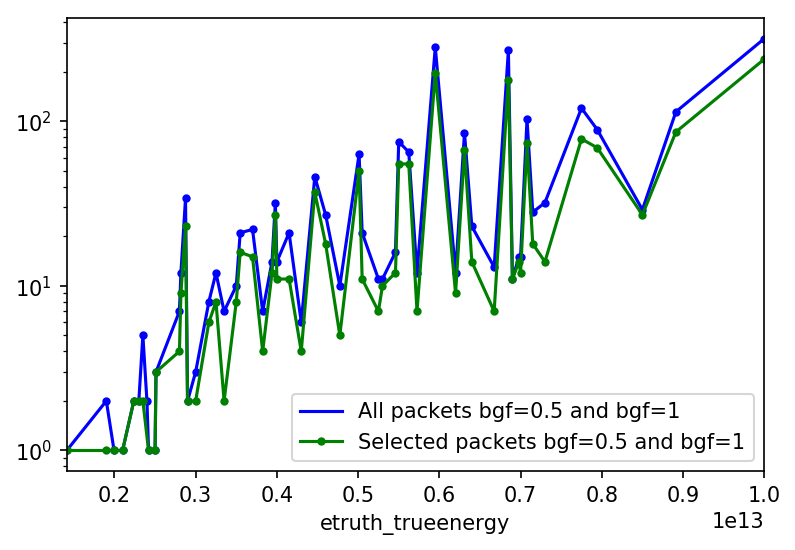

In [60]:
ax_t_all_bgf05_simu_events_by_energy = t_all_bgf05_simu_events_by_energy.plot(x='etruth_trueenergy',y='count_packets',marker='.',linestyle='-', color='blue', label="All packets bgf=0.5 and bgf=1")
#all_bgf10_simu_events_by_energy.plot(x='etruth_trueenergy',y='count_packets',marker='.',linestyle='-', color='red', ax=ax_all_simu_events_by_energy)
t_cond_bgf05_simu_events_by_energy.plot(x='etruth_trueenergy',y='count_packets',marker='.',linestyle='-', color='green', ax=ax_t_all_bgf05_simu_events_by_energy, label="Selected packets bgf=0.5 and bgf=1")
ax_t_all_bgf05_simu_events_by_energy.set_yscale("log", nonposy='clip')
plt.show()

In [55]:
t_cond_bgf05_simu_events_by_energy_merged = pd.merge(t_cond_bgf05_simu_events_by_energy, t_all_bgf05_simu_events_by_energy,
                                    how='outer',
                                    suffixes=['_cond','_all'],
                                    on=['etruth_trueenergy'])
t_cond_bgf05_simu_events_by_energy_merged_nona = t_cond_bgf05_simu_events_by_energy_merged.dropna().copy()
t_cond_bgf05_simu_events_by_energy_merged_nona['count_fraction'] = t_cond_bgf05_simu_events_by_energy_merged_nona['count_packets_cond'] / t_cond_bgf05_simu_events_by_energy_merged_nona['count_packets_all']
t_cond_bgf05_simu_events_by_energy_merged_nona

,count_packets_cond,etruth_trueenergy,count_packets_all,count_fraction
0,1.0,1.412540e+12,1,1.000000
1,1.0,1.900000e+12,2,0.500000
2,1.0,1.995260e+12,1,1.000000
3,1.0,2.100000e+12,1,1.000000
4,2.0,2.238720e+12,2,1.000000
5,2.0,2.300000e+12,2,1.000000
6,2.0,2.350000e+12,5,0.400000
7,1.0,2.420000e+12,1,1.000000
8,1.0,2.500000e+12,1,1.000000
9,3.0,2.511890e+12,3,1.000000


In [141]:
n1 = t_cond_bgf05_simu_events_by_energy_merged_nona['count_packets_cond']
n2 = t_cond_bgf05_simu_events_by_energy_merged_nona['count_packets_all']

yerrs = list( np.sqrt( ((1-(n1/n2))/n1) + (1/n2) ) ) 
#yerrs = list( np.sqrt(n1 * (1 - n1/n2))/n2 )
yerrs


[1.0,
 1.0,
 1.0,
 1.0,
 0.70710678118654757,
 0.70710678118654757,
 0.70710678118654757,
 1.0,
 1.0,
 0.57735026918962573,
 0.5,
 0.33333333333333331,
 0.20851441405707477,
 0.70710678118654757,
 0.70710678118654757,
 0.40824829046386302,
 0.35355339059327379,
 0.70710678118654757,
 0.35355339059327379,
 0.25,
 0.25819888974716115,
 0.5,
 0.28867513459481287,
 0.19245008972987526,
 0.30151134457776363,
 0.30151134457776363,
 0.5,
 0.16439898730535729,
 0.23570226039551584,
 0.44721359549995793,
 0.1414213562373095,
 0.30151134457776363,
 0.3779644730092272,
 0.31622776601683794,
 0.28867513459481287,
 0.13483997249264842,
 0.13483997249264842,
 0.3779644730092272,
 0.071247049987909636,
 0.33333333333333331,
 0.12216944435630522,
 0.2672612419124244,
 0.3779644730092272,
 0.074743509275193576,
 0.30151134457776363,
 0.2672612419124244,
 0.28867513459481287,
 0.11624763874381927,
 0.23570226039551584,
 0.2672612419124244,
 0.11322770341445958,
 0.1203858530857692,
 0.19245008972987526,

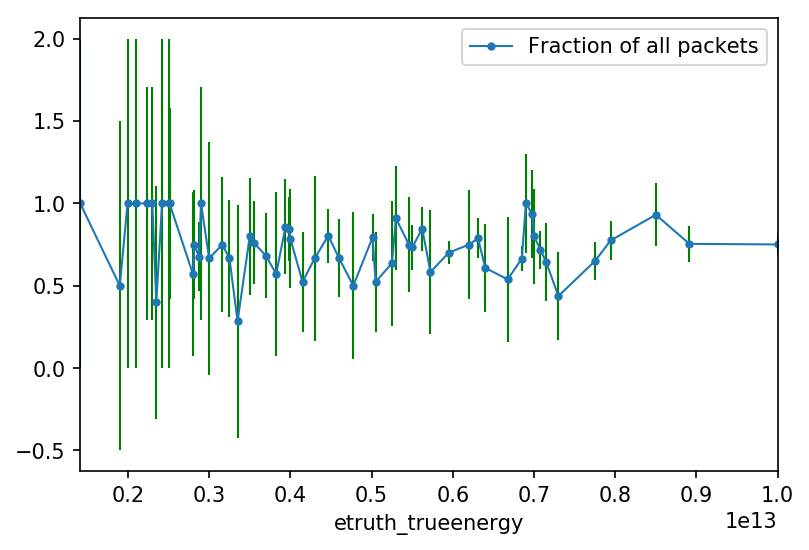

In [146]:
t_cond_bgf05_simu_events_by_energy_merged_nona.plot(x='etruth_trueenergy', y='count_fraction', yerr=yerrs, marker='.',linestyle='-', ecolor='green', linewidth=1, label='Fraction of all packets')
plt.show()
# plt.errorbar(t_cond_bgf05_simu_events_by_energy_merged_nona['etruth_trueenergy'], 
#              t_cond_bgf05_simu_events_by_energy_merged_nona['count_fraction'], yerr=yerrs, marker='.',linestyle='-', ecolor='green', linewidth=1)
# plt.show()

In [57]:
# simu2npy_pathanme_glob = "/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_18000000/namefiles18000000.0A6.19999972557e+12E.txt/simu.2017-07-22-04h32m23s/simu2npy/ev_12_*signals.npy"
# simu2npy_pathanme = glob.glob(simu2npy_pathanme_glob)
# ev_frames = np.load(simu2npy_pathanme[0])
# npy_vis.visualize_frame(np.maximum.reduce(ev_frames))